In [ ]:
import cv2
import os
import tensorflow as tf

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
directory = os.path.join('data', 'dog')

if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
full_path = os.getcwd() + '/' + directory

print("The full path of the directory is:", full_path)

The full path of the directory is: /content/data/cat


In [ ]:
gpus = tf.config.experimental.list_physical_devices("GPU")

In [ ]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import imghdr

In [ ]:
data_dir = os.path.join('gdrive', 'MyDrive', 'data')

In [ ]:
image_exts = ['jpeg', 'jpg', 'png', 'bmp', 'tiff', 'gif', 'JPG']


In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
          print('image not in ext list {}'.format(image_path))
          os.remove(image_path)
    except Exception as e:
        print('Issue with image{}'.format(image_path))



In [ ]:

from google.colab.patches import cv2_imshow

In [ ]:
data_dir

'gdrive/MyDrive/data'

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 214 files belonging to 2 classes.


In [ ]:
# data_iterator = data.as_numpy_iterator()

In [ ]:
# batch = data_iterator.next()

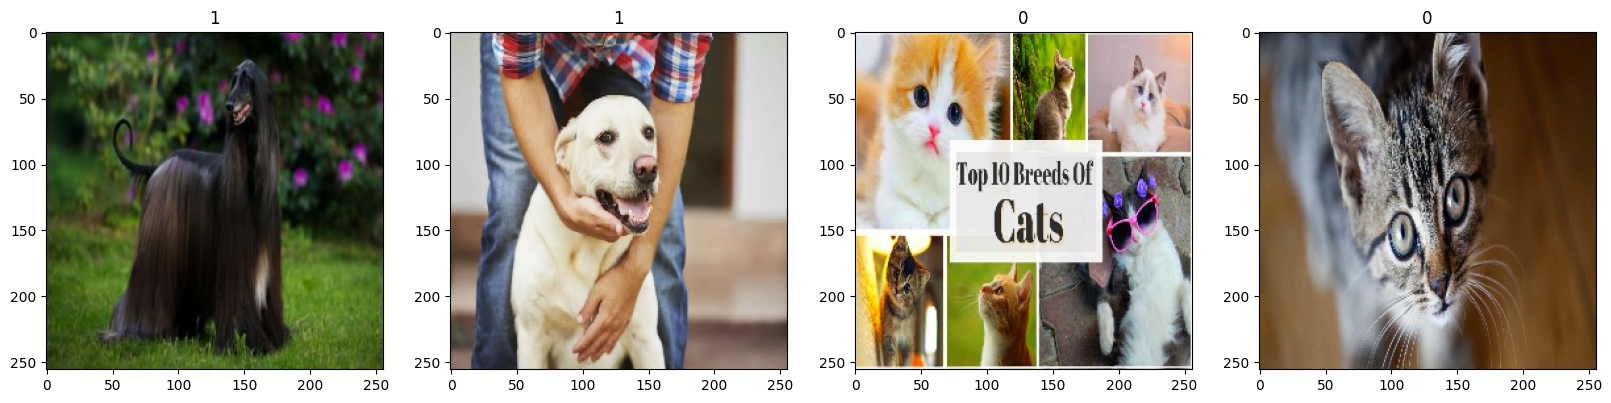

In [ ]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#   ax[idx].imshow(img.astype(int))
#   ax[idx].title.set_text(batch[1][idx])

1 - Dog 2 - Cat

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

In [ ]:
len(data)

7

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
val_size

2

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
len(val)

2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss=tf.losses.binary_crossentropy, metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 30s 2s/step - loss: 1.3003 - accuracy: 0.4297 - val_loss: 0.5956 - val_accuracy: 0.7500
Epoch 2/20
4/4 [==============================] - 15s 2s/step - loss: 0.6188 - accuracy: 0.6484 - val_loss: 0.6341 - val_accuracy: 0.6406
Epoch 3/20
4/4 [==============================] - 15s 3s/step - loss: 0.6210 - accuracy: 0.6328 - val_loss: 0.5982 - val_accuracy: 0.6094
Epoch 4/20
4/4 [==============================] - 19s 3s/step - loss: 0.5992 - accuracy: 0.6719 - val_loss: 0.5515 - val_accuracy: 0.6875
Epoch 5/20
4/4 [==============================] - 15s 3s/step - loss: 0.5210 - accuracy: 0.7109 - val_loss: 0.4950 - val_accuracy: 0.8125
Epoch 6/20
4/4 [==============================] - 15s 2s/step - loss: 0.5214 - accuracy: 0.7109 - val_loss: 0.5597 - val_accuracy: 0.6719
Epoch 7/20
4/4 [==============================] - 15s 3s/step - loss: 0.4981 - accuracy: 0.7578 - val_loss: 0.4387 - val_accuracy: 0.8750
Epoch 8/20
4/4 [==================

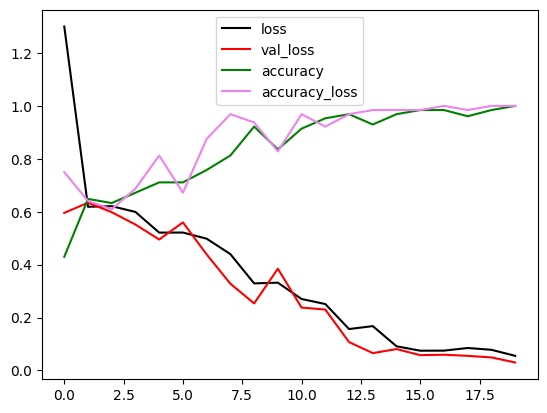

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='black', label = 'loss')
plt.plot(hist.history['val_loss'],color='red', label = 'val_loss')
plt.plot(hist.history['accuracy'],color='green', label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color='violet', label = 'accuracy_loss')
plt.legend(loc='upper center')
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  x, y = batch
  yhat = model.predict(x)
  precision.update_state(y, yhat)


1/1 [==============================] - 0s 42ms/step


In [ ]:
print(precision.result().numpy())

1.0


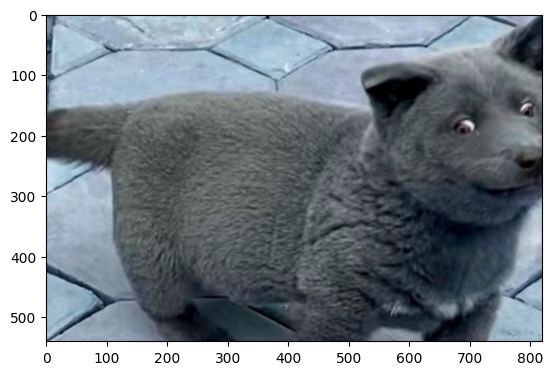

In [ ]:
img = cv2.imread('/content/maxresdefault.jpg')
plt.imshow(img)

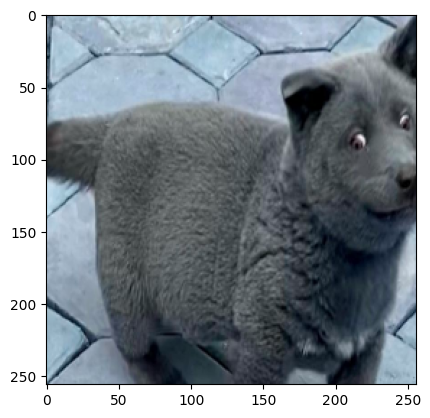

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show( )

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 22ms/step


In [ ]:
yhat

array([[0.01053861]], dtype=float32)

In [ ]:
if yhat <50:
  print("dog")
else:
  print("cat")

dog


In [ ]:
model.save(os.path.join('models','dogorcar.h5'))

In [ ]:
print(os.stat("/content/models/dogorcar.h5"))

os.stat_result(st_mode=33188, st_ino=2622318, st_dev=46, st_nlink=1, st_uid=0, st_gid=0, st_size=44409872, st_atime=1682254926, st_mtime=1682254909, st_ctime=1682254909)


In [ ]:
file_size = os.path.getsize('/content/models/dogorcar.h5')
print("File Size is :", file_size, "bytes")

File Size is : 44409872 bytes
